### Project-Breast-Cancer (Data exploration)
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Information about variables
1) Sample ID  
2) Diagnosis (M = malignant, B = benign)  
3) radius (mean of distances from center to points on the perimeter)  
4) texture (standard deviation of gray-scale values)  
5) perimeter  
6) area  
7) smoothness (local variation in radius lengths)  
8) compactness (perimeter^2 / area - 1.0)  
9) concavity (severity of concave portions of the contour)  
10) concave points (number of concave portions of the contour)  
11) symmetry  
12) fractal dimension ("coastline approximation" - 1) 

In [83]:
# Import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [84]:
# Open CSV file of data
data = pd.read_csv('../data/data.csv')

### Data information

In [85]:
# Get dimensions of the data
## 569 instances
## 33 features
data.shape

(569, 33)

In [86]:
# Get a listing of the different variables
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [87]:
# Get columns types
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [88]:
# Explore the structure of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
# Fix one of the column names so they have all underscores
data.rename(index=str, 
            columns={"concave points_mean": "concave_points_mean", 
                     "concave points_se": "concave_points_se", 
                     "concave points_worst": "concave_points_worst"},
            inplace=True)


In [90]:
# Explore the structure of the data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [91]:
# Check to see if there are any duplicate ID's
sum(data['id'].duplicated() ==  True)

0

In [92]:
# Get the breakdown of the number of benign/malignant samples
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [93]:
# Find if there exist columns that have NaN values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [94]:
# Remove the last column (Unnamed: 32)
data = data.drop(['Unnamed: 32'], axis=1)

### Training/Testing split

In [95]:
# Gather only the columns for prediction
X = data.drop(['diagnosis'], axis = 1)

# Gather the column for labelling
y = data['diagnosis']

# Use SKlearn's function to split 80/20 (seed = 30)
from sklearn.model_selection import train_test_split  
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.20, random_state=30) 

# Add labels back to data
data_train['diagnosis'] = labels_train.values
data_test['diagnosis'] = labels_test.values

# View the breakdown of the training set to make sure it is not skewed
print("Number of Malignant samples: ", sum(data_train['diagnosis'] == 'M'))
print("Number of Benign samples: ", sum(data_train['diagnosis'] == 'B'))

# Save the training data with labels as CSV
data_train.to_csv('../data/training_data.csv')

# Save the testing data with labels as CSV
data_test.to_csv('../data/testing_data.csv')

Number of Malignant samples:  150
Number of Benign samples:  248


/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [100]:
# Create data without labels
data_train_nolabel = data_train.drop(['diagnosis'], axis=1)

### Principal Component Analysis

In [109]:
# Make a PCA of all the features
from sklearn.decomposition import PCA

# Scale only the predicting numerical columns 
data_train_scaled = StandardScaler().fit_transform(data_train_nolabel)

# Create new PCA model (Use 2 components)
pca = PCA(n_components = 2)

# Fit the scaled data to the model
pca_fitted = pca.fit_transform(data_train_scaled)

# Create a new dataframe to store PC's
pca_df = pd.DataFrame(data = pca_fitted, columns = ['PC1', 'PC2'])

# Add class information as a column identifier
pca_df['diagnosis'] = data_train.diagnosis.values

# Print the explain variance calculated
print("PC1 explains: ", pca.explained_variance_ratio_[0] * 100, "%")
print("PC2 explains: ", pca.explained_variance_ratio_[1] * 100, "%")

PC1 explains:  44.6941332627 %
PC2 explains:  19.4107115 %


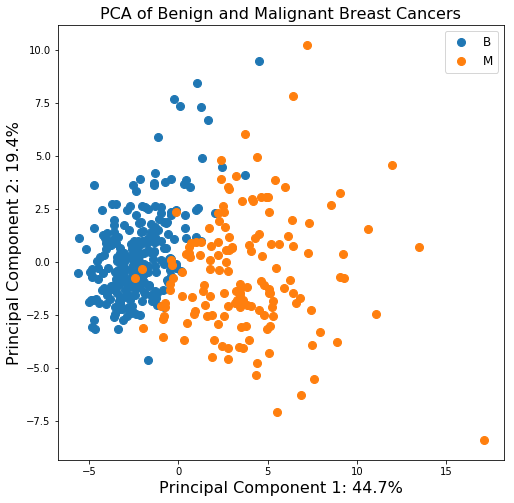

In [111]:
# Change the size of the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

# Generate a scatter plot of the two groups
## Iterate over group? weird?
groups = pca_df.groupby('diagnosis')
for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=8, label=name)

# Change the legends/axes
plt.title('PCA of Benign and Malignant Breast Cancers', fontsize = 16)
plt.xlabel('Principal Component 1: ' + str(round(pca.explained_variance_ratio_[0] * 100, 1)) + "%", fontsize = 16)
plt.ylabel('Principal Component 2: ' + str(round(pca.explained_variance_ratio_[1] * 100, 1)) + "%", fontsize = 16)
plt.legend(fontsize = 12)

# Save plot
plt.savefig('../figures/eda_pca.png', dpi=150)

### Plot boxplots of 10 numerical variables (Unscaled)

/Users/tom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


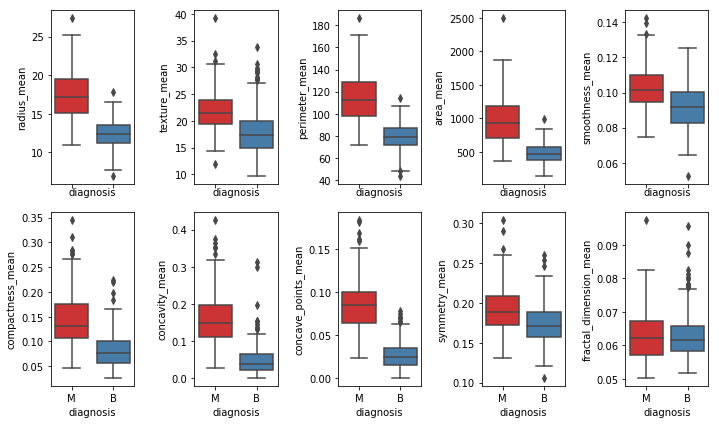

In [113]:
# Create a 5x2 subplot
f, ax = plt.subplots(2, 5, figsize=(10, 6), sharex=True)

# Plot first 10 variables
sns.boxplot(x="diagnosis", y='radius_mean', data=data_train, palette="Set1", ax=ax[0][0])
sns.boxplot(x="diagnosis", y='texture_mean', data=data_train, palette="Set1", ax=ax[0][1])
sns.boxplot(x="diagnosis", y='perimeter_mean', data=data_train, palette="Set1", ax=ax[0][2])
sns.boxplot(x="diagnosis", y='area_mean', data=data_train, palette="Set1", ax=ax[0][3])
sns.boxplot(x="diagnosis", y='smoothness_mean', data=data_train, palette="Set1", ax=ax[0][4])
sns.boxplot(x="diagnosis", y='compactness_mean', data=data_train, palette="Set1", ax=ax[1][0])
sns.boxplot(x="diagnosis", y='concavity_mean', data=data_train, palette="Set1", ax=ax[1][1])
sns.boxplot(x="diagnosis", y='concave_points_mean', data=data_train, palette="Set1", ax=ax[1][2])
sns.boxplot(x="diagnosis", y='symmetry_mean', data=data_train, palette="Set1", ax=ax[1][3])
sns.boxplot(x="diagnosis", y='fractal_dimension_mean', data=data_train, palette="Set1", ax=ax[1][4])
plt.tight_layout()

# Save figure to file
plt.savefig("../figures/eda_varibles_unscaled.png", dpi = 150)

### Scale the training set

In [114]:
# Scale using standard scaling (mean - x / std)
scaler = preprocessing.StandardScaler()
data_train_scaled_std = scaler.fit_transform(data_train_nolabel)

# Scale using standard scaling (mean - x / std)
scaler = preprocessing.MinMaxScaler()
data_train_scaled_minmax = scaler.fit_transform(data_train_nolabel)

# Convert array back to pandas dataframe
data_train_scaled_std = pd.DataFrame(data_train_scaled_std, columns = list(data_train_nolabel.columns))
data_train_scaled_minmax = pd.DataFrame(data_train_scaled_minmax, columns = list(data_train_nolabel.columns))

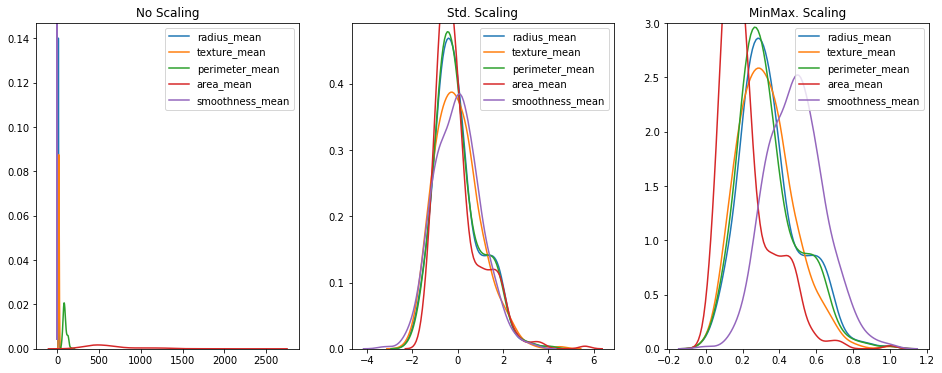

In [115]:
# Set figure attributes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))

# Plot before/after of 5 variables
ax1.set_title('No Scaling')
sns.kdeplot(data_train['radius_mean'], ax=ax1)
sns.kdeplot(data_train['texture_mean'], ax=ax1)
sns.kdeplot(data_train['perimeter_mean'], ax=ax1)
sns.kdeplot(data_train['area_mean'], ax=ax1)
sns.kdeplot(data_train['smoothness_mean'], ax=ax1)
ax2.set_title('Std. Scaling')
sns.kdeplot(data_train_scaled_std['radius_mean'], ax=ax2)
sns.kdeplot(data_train_scaled_std['texture_mean'], ax=ax2)
sns.kdeplot(data_train_scaled_std['perimeter_mean'], ax=ax2)
sns.kdeplot(data_train_scaled_std['area_mean'], ax=ax2)
sns.kdeplot(data_train_scaled_std['smoothness_mean'], ax=ax2)
ax3.set_title('MinMax. Scaling')
sns.kdeplot(data_train_scaled_minmax['radius_mean'], ax=ax3)
sns.kdeplot(data_train_scaled_minmax['texture_mean'], ax=ax3)
sns.kdeplot(data_train_scaled_minmax['perimeter_mean'], ax=ax3)
sns.kdeplot(data_train_scaled_minmax['area_mean'], ax=ax3)
sns.kdeplot(data_train_scaled_minmax['smoothness_mean'], ax=ax3)
plt.show()

# Save figure
fig.savefig('../figures/eda_distribution_scale.png', dpi = 150)

In [134]:
# Fit scaling
scaler = preprocessing.StandardScaler().fit(data_train_nolabel)

# Fit training data
X_train_std = scaler.transform(data_train_nolabel)
X_train_std = pd.DataFrame(X_train_std, columns = list(data_train_nolabel.columns))
X_train_std['diagnosis'] = data_train.diagnosis.values
X_train_std.to_csv('../output/data_train_scaled.csv')

# Fit testing data
data_test_nolabel = data_test.drop(['diagnosis'], axis = 1)
X_test_std = scaler.transform(data_test_nolabel)
X_test_std = pd.DataFrame(X_test_std, columns = list(data_test_nolabel.columns))
X_test_std['diagnosis'] = data_test.diagnosis.values
X_test_std.to_csv('../output/data_test_scaled.csv')